In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

from tensorflow.keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])

from tensorflow.keras import losses
from tensorflow.keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# model.compile(optimizer='rmsprop',
# loss='binary_crossentropy',
# metrics=['acc'])
history = model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val))



#Compensate for overfitting by buiding + training new model for 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
newhistory = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
# results = model.evaluate(x_test, y_test)
# print(results)
# predicts = model.predict(x_test)
# print(model.predict(x_test)) # shows confidence of predictions 
# epochs = range(1, len(predicts) + 1)
# plt.plot(epochs, predicts, 'bo', label='Confidence')
# plt.title('Validation Confidence')
# plt.xlabel('Epochs')
# plt.ylabel('Decision (Binary)')
# plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.4954 - accuracy: 0.7958 - val_loss: 0.3761 - val_accuracy: 0.8702
Epoch 2/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.2954 - accuracy: 0.9076 - val_loss: 0.3208 - val_accuracy: 0.8720
Epoch 3/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.2224 - accuracy: 0.9279 - val_loss: 0.2791 - val_accuracy: 0.8901
Epoch 4/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1753 - accuracy: 0.9434 - val_loss: 0.2780 - val_accuracy: 0.8878
Epoch 5/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.1421 - accuracy: 0.9555 - val_loss: 0.2792 - val_accuracy: 0.8899
Epoch 6/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1178 - accuracy: 0.9642 - val_loss: 0.3018 - val_accuracy: 0.8865
Epoch 7/20
15000/15000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


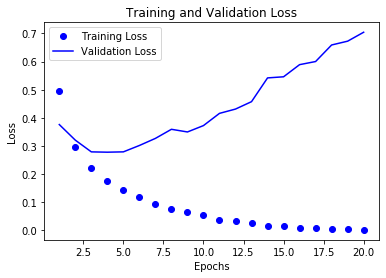

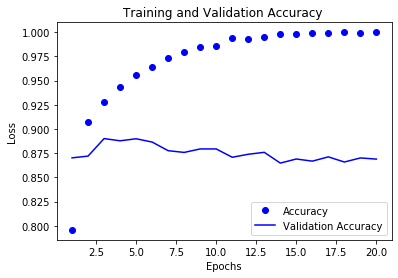

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


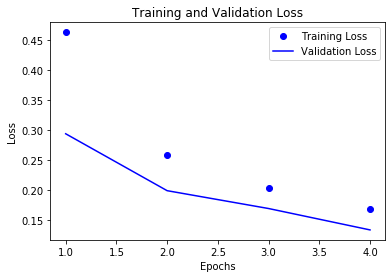

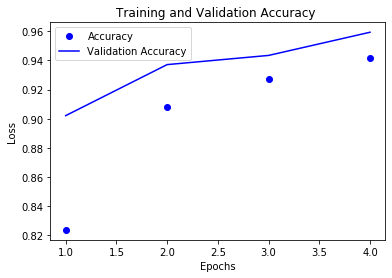

In [6]:
#Plotting training and validation loss 

import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Now new 4 epoch model-------------------------------
#Plotting training and validation loss 

history_dict = newhistory.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()